<a href="https://colab.research.google.com/github/capofwesh20/Masters-Thesis/blob/main/Thesis_Image_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import os
import ipywidgets as widgets
import random
from IPython.display import display
from PIL import Image, ImageOps
import plotly.graph_objects as go
import glob

In [ ]:
mat = scipy.io.loadmat('/content/train_binary.mat')
train_images = mat['train_images']



Train Images are 1000 MNIST data

In [ ]:
# Access the first array within 'train_images'
first_array = mat['train_images']

# Print the shape of the first array
print(first_array.shape)


(32, 32, 1000)


In [ ]:
# Step 1: Calculate the pixel sum for each image
pixel_sums = np.sum(first_array, axis=(0, 1))

# Step 2: Group the summed pixel values

bin_ranges = np.arange(start=pixel_sums.min(), stop=pixel_sums.max(), step=50)
hist, bin_edges = np.histogram(pixel_sums, bins=bin_ranges)

# Step 3: Create a table of the grouped data
print("Pixel Sum Range", "Image Count", sep="\t")
for i in range(len(hist)):
    print(f"{bin_edges[i]}-{bin_edges[i+1]}", hist[i], sep="\t\t")


Pixel Sum Range	Image Count
91.0-141.0		37
141.0-191.0		163
191.0-241.0		317
241.0-291.0		293
291.0-341.0		139
341.0-391.0		46


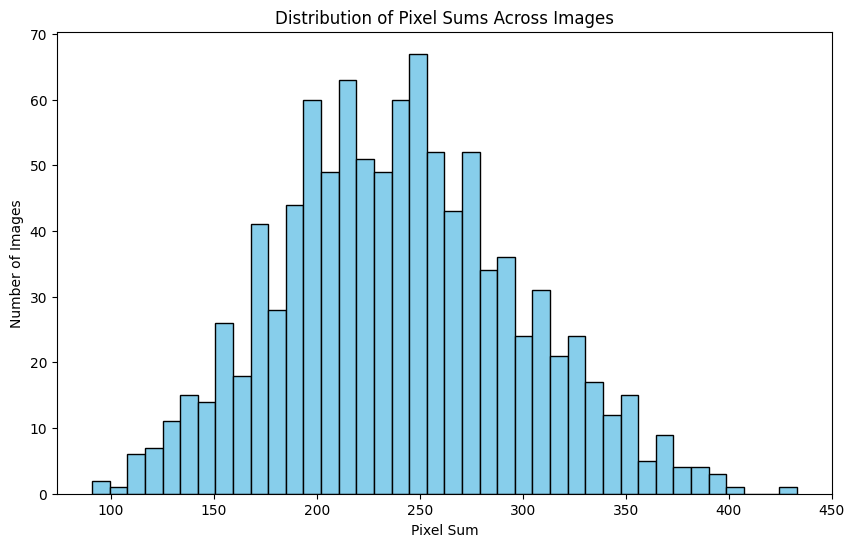

In [ ]:

# Create a histogram to visualize the distribution of pixel sums
plt.figure(figsize=(10, 6))
plt.hist(pixel_sums, bins=40, color='skyblue', edgecolor='black')  #

# Add titles and labels
plt.title('Distribution of Pixel Sums Across Images')
plt.xlabel('Pixel Sum')
plt.ylabel('Number of Images')

# Show the plot
plt.show()


Visualizing some of the Data

In [ ]:
first_array.shape

(32, 32, 1000)

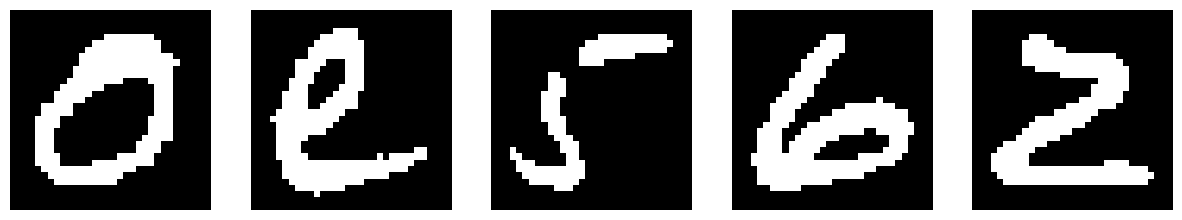

In [ ]:
first_5_images = rearranged_array[:10]
# Plotting the first 5 images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes.flat):
    ax.imshow(first_5_images[i], cmap='gray')
    ax.axis('off')
plt.show()


In [ ]:

# Assuming 'first_array' and 'pixel_sums' are already defined
ranges_to_split = [(91.0, 141.0), (141.0, 191.0), (191.0, 241.0), (241.0, 291.0), (291.0, 341.0), (341.0, 391.0)]
indices_for_first_array2 = []

# Find indices for each range and pick one for first_array2
for range_min, range_max in ranges_to_split:
    indices = np.where((pixel_sums >= range_min) & (pixel_sums < range_max))[0]
    if indices.size > 0:
        indices_for_first_array2.append(indices[0])  # Select the first available image in the range

# Construct first_array2 from selected indices
first_array2 = first_array[:, :, indices_for_first_array2]

# Remove selected images from first_array to create first_array1
mask = np.ones(first_array.shape[2], dtype=bool)  # Create a mask for all images
mask[indices_for_first_array2] = False  # Set selected indices to False
first_array1 = first_array[:, :, mask]

# Verify by recomputing the pixel sums and histograms for first_array1
pixel_sums1 = np.sum(first_array1, axis=(0, 1))
bin_ranges = np.arange(start=pixel_sums.min(), stop=pixel_sums.max(), step=50)
hist1, bin_edges = np.histogram(pixel_sums1, bins=bin_ranges)

# Print updated table for first_array1
print("Pixel Sum Range", "Image Count", sep="\t")
for i in range(len(hist1)):
    print(f"{bin_edges[i]}-{bin_edges[i+1]}", hist1[i], sep="\t\t")


Pixel Sum Range	Image Count
91.0-141.0		36
141.0-191.0		162
191.0-241.0		316
241.0-291.0		292
291.0-341.0		138
341.0-391.0		45


In [ ]:

# Compute pixel sums for images in first_array2
pixel_sums2 = np.sum(first_array2, axis=(0, 1))

# We will use the bin edges from the initial calculation
# This is based on the bin ranges used before and assumes they are already defined in the script
bin_ranges = np.arange(start=pixel_sums.min(), stop=pixel_sums.max(), step=50)
hist2, bin_edges = np.histogram(pixel_sums2, bins=bin_ranges)

# Print the updated table for first_array2
print("Pixel Sum Range", "Image Count", sep="\t")
for i in range(len(hist2)):
    print(f"{bin_edges[i]}-{bin_edges[i+1]}", hist2[i], sep="\t\t")


Pixel Sum Range	Image Count
91.0-141.0		1
141.0-191.0		1
191.0-241.0		1
241.0-291.0		1
291.0-341.0		1
341.0-391.0		1


In [ ]:
first_array1.shape

(32, 32, 994)

In [ ]:
first_array2.shape

(32, 32, 6)

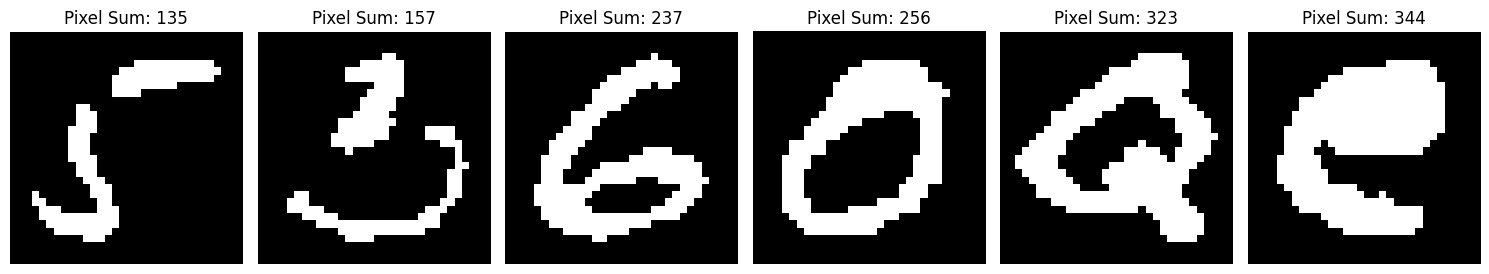

In [ ]:
# Plotting each image in first_array2 with pixel sum in the title
n_images = first_array2.shape[2]  # Number of images in first_array2
fig, axes = plt.subplots(1, n_images, figsize=(15, 5))  # Adjust figsize as needed

for i in range(n_images):
    ax = axes[i] if n_images > 1 else axes
    ax.imshow(first_array2[:, :, i], cmap='gray')  # Assuming images are grayscale
    ax.set_title(f'Pixel Sum: {pixel_sums2[i]}')
    ax.axis('off')  # Hide axes for clarity

plt.tight_layout()
plt.show()


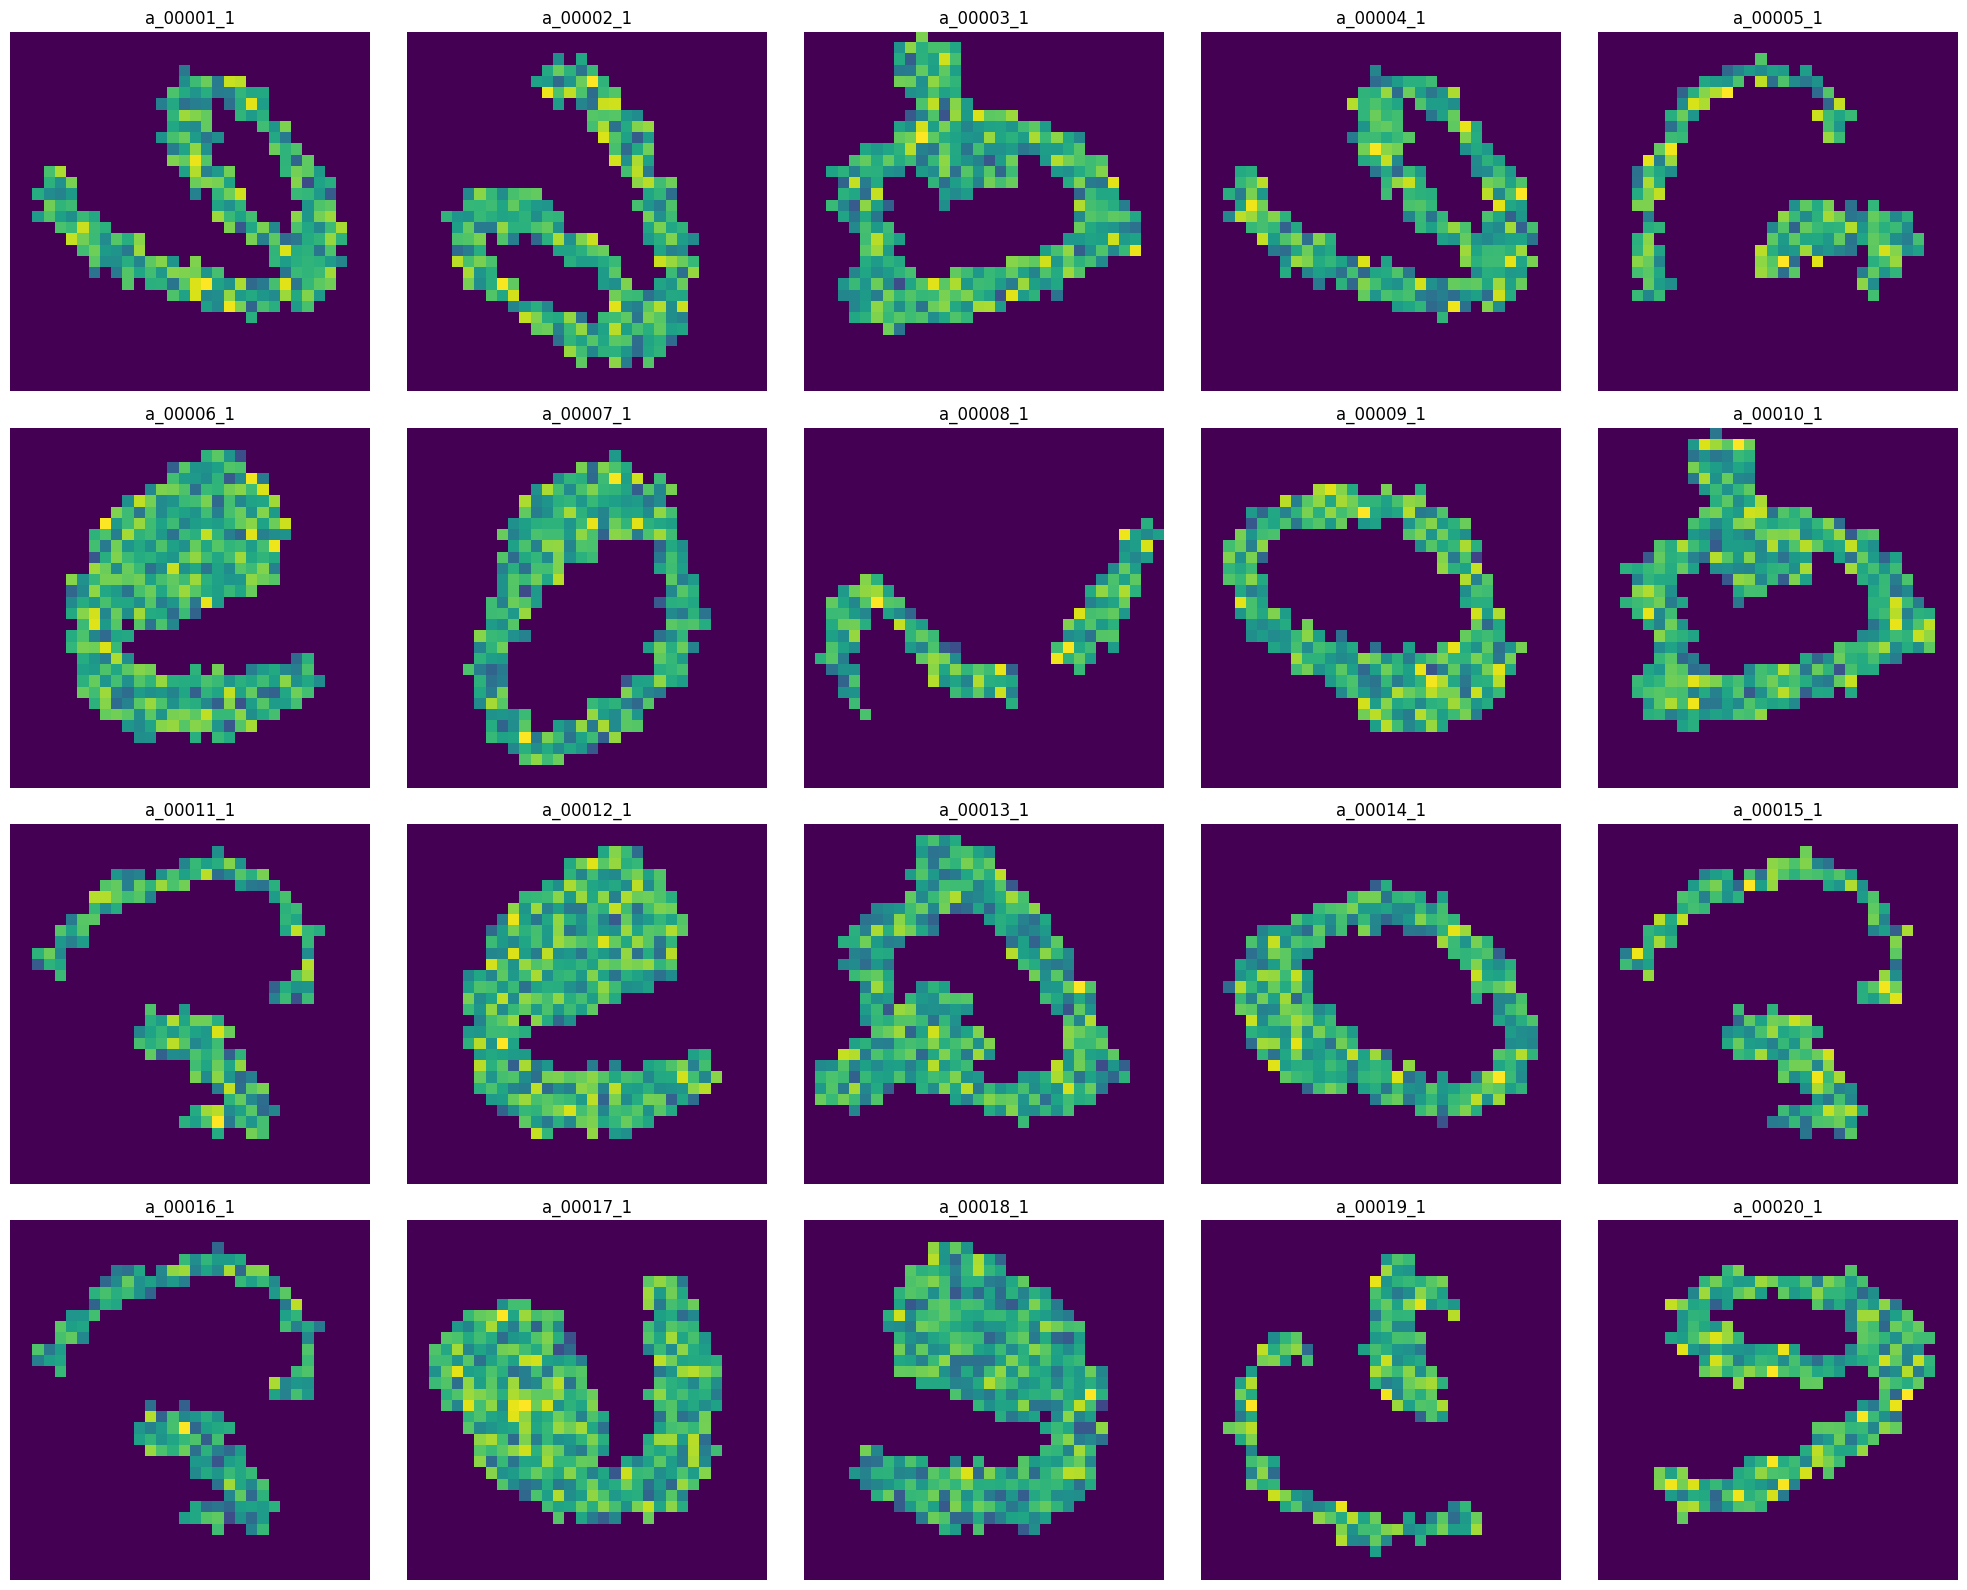

In [ ]:


# Path to the directory containing the images
directory_path = '/content/drive/MyDrive/Thesis/test/'

# List all .npz files in the directory
files = [f for f in os.listdir(directory_path) if f.endswith('.npz')]

# Set up the plot - adjust figsize to fit all images comfortably
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))  # Adjust layout based on number of images
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through files and plot each one
for ax, file in zip(axes, files):
    # Load the data from each .npz file
    data = np.load(os.path.join(directory_path, file))
    sigD = data['sigD']  # Assuming 'sigD' is the key for the image data

    # Compute the 2D projection by summing along the depth axis
    projection = np.sum(sigD, axis=2)

    # Plot the projection
    ax.imshow(projection, cmap='viridis')
    ax.set_title(file.split('.')[0])  # Set title to the filename without extension
    ax.axis('off')  # Turn off axis

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


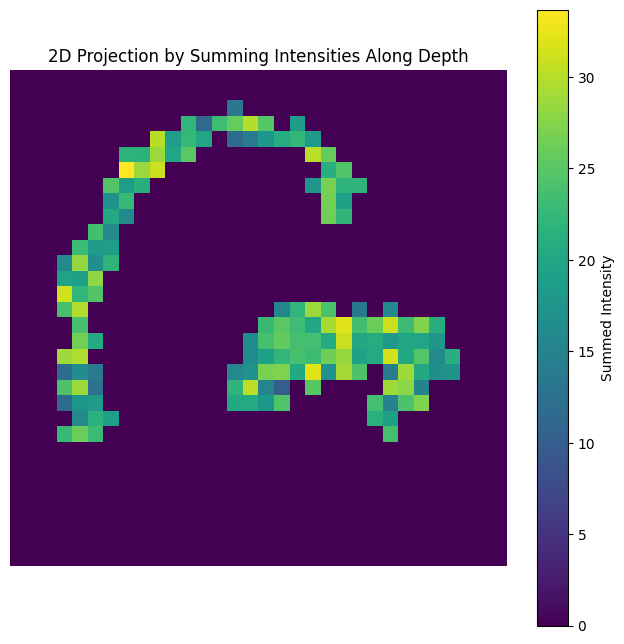

In [ ]:
# Load the .npz file
data = np.load('/content/drive/MyDrive/Thesis/test/a_00010_1.npz')
sigD = data['sigD']  # Assuming sigD is the data you want to work with

# Sum along the depth axis (assuming the depth axis is the last axis)
projection = np.sum(sigD, axis=2)

# Plotting the 2D projection
plt.figure(figsize=(8, 8))
plt.imshow(projection, cmap='viridis')  # You can change the colormap to any suitable one
plt.title('2D Projection by Summing Intensities Along Depth')
plt.colorbar(label='Summed Intensity')
plt.axis('off')  # Hide the axes
plt.show()


In [ ]:
# Load the .npz file
data = np.load('/content/drive/MyDrive/Thesis/new_augment_250/a_00001_1.npz')
sigD = data['sigD']  # Assuming sigD is the data you want to work with

# Function to show a slice of the data
def show_slice(sigD, t=0, colormap='viridis'):
    # Transpose the data: change from (0, 1, 2) to (2, 0, 1)
    transposed_sigD = sigD.transpose(2, 0, 1)
    plt.figure(figsize=(6, 6))
    # Use the transposed data for displaying
    plt.imshow(transposed_sigD[t, :, :], cmap=colormap)
    plt.title(f"Slice t={t}")
    plt.colorbar(label='Intensity')
    plt.axis('off')
    plt.show()

# Setting up the interactive widgets
interactive_plot = widgets.interactive(show_slice,
                                       sigD=widgets.fixed(sigD),
                                       t=widgets.IntSlider(min=0, max=sigD.transpose(2, 0, 1).shape[0]-1, step=1, value=0, description='t index'),
                                       colormap=widgets.Dropdown(options=['gray', 'viridis', 'plasma', 'inferno', 'magma', 'cividis'], value='viridis', description='Colormap'))
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='t index', max=255), Dropdown(description='Colormap', ind…

In [ ]:
def generate_intensity(image):
    # Get dimensions of the input image
    m, n = image.shape

    # Generate a random matrix of intensity values within the range 50-300
    int1 = np.random.rand(m, n) * 40 + 10

    # Multiply the random intensity matrix element-wise with the input image
    intensity = int1 * image

    return intensity


In [ ]:

def generate_lifetime(image):
    # Get dimensions of the input image
    m, n = image.shape

    # Generate random matrices for tau1 and tau2 with values in specified ranges
    tau1 = np.random.rand(m, n) * 0.4 + 0.2
    tau2 = np.random.rand(m, n) * 4.2 + 0.8

    # Element-wise multiply with the input image
    tau1 = tau1 * image
    tau2 = tau2 * image

    # Generate a random matrix for the ratio, also element-wise multiplied by the image
    ratio = np.random.rand(m, n) * image

    return tau1, tau2, ratio


In [ ]:
new_irf = np.load('/content/Control 1_Ch2_irf.npy')

In [ ]:
new_irf.shape

(256,)

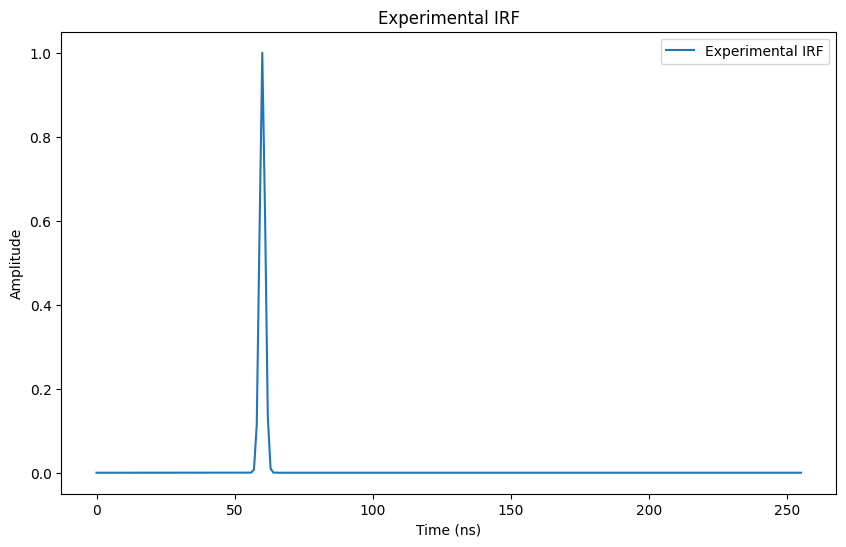

In [ ]:
irf_exp = new_irf

# Create a new time axis for irf_exp

time_axis_exp = np.arange(0, len(irf_exp), 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_axis_exp, irf_exp, label=f'Experimental IRF')
plt.xlabel('Time (ns)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Experimental IRF')
plt.show()


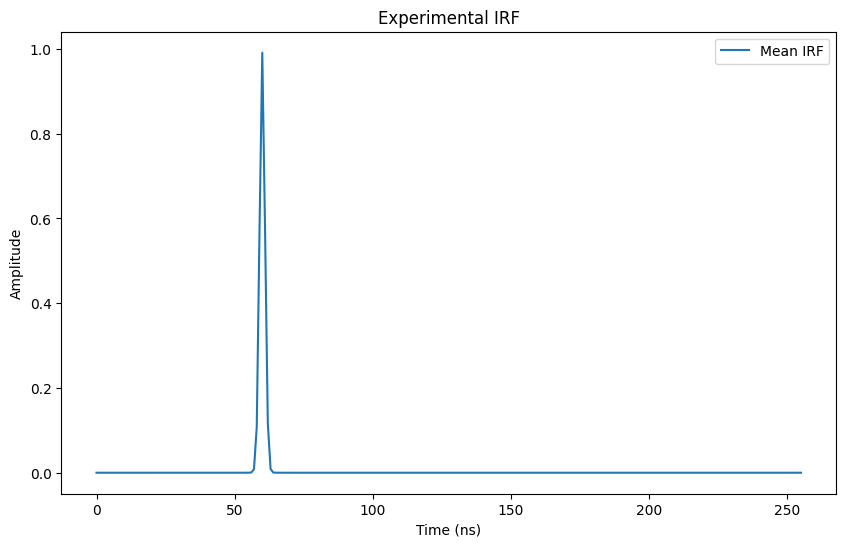

In [ ]:


# Create a new time axis for irf_exp

time_axis_exp = np.arange(0, len(mean_irf), 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_axis_exp, mean_irf, label=f'Mean IRF')
plt.xlabel('Time (ns)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Experimental IRF')
plt.show()


In [ ]:

# Create the plot with plotly
fig = go.Figure(data=go.Scatter(x=time_axis_exp, y=new_irf, mode='lines'))
fig.update_layout(title='Fluorescence Decay at Pixel (12,12)',
                  xaxis_title='Time (ns)',
                  yaxis_title='Normalized Fluorescence Decay Curve',
                  hovermode='x')
fig.show()


In [ ]:

path_to_files = '/content/drive/MyDrive/SCC74A_Image_Export_irf/*irf*.npy'

file_paths = glob.glob(path_to_files)


if file_paths:  # Check if any files were found
    sum_array = np.load(file_paths[0])

    # Loop through the remaining files and accumulate the sum
    for file_path in file_paths[1:]:
        sum_array += np.load(file_path)


    mean_irf = sum_array / len(file_paths)


    print("Mean irf calculated successfully.")
else:
    print("No '.npy' files containing 'irf' found at the specified location.")


Mean irf calculated successfully.


In [ ]:
len(file_paths)

28

In [ ]:

# Create the plot with plotly
fig = go.Figure(data=go.Scatter(x=time_axis_exp, y=mean_irf, mode='lines'))
fig.update_layout(title='Mean IRF',
                  xaxis_title='Time (ns)',
                  yaxis_title='Amplitude',
                  hovermode='x')
fig.show()


In [ ]:

# Create the plot with plotly
fig = go.Figure(data=go.Scatter(x=time_axis_exp, y= sigD[yC, xC, :], mode='lines'))
fig.update_layout(title='Fluorescence Decay at Pixel (12,12)',
                  xaxis_title='Time (ns)',
                  yaxis_title='Normalized Fluorescence Decay Curve',
                  hovermode='x')
fig.show()


In [ ]:

# # Access the first array within 'train_images'
# first_array = resized_images_opencv[10,:,:]

# # Print the shape of the first array
# print(first_array.shape)



# Get the maximum and minimum pixel values
max_pixel_value = np.amax(first_array)
min_pixel_value = np.amin(first_array)

# Print the maximum and minimum pixel values
print(f'Max Pixel Value: {max_pixel_value}')
print(f'Min Pixel Value: {min_pixel_value}')


Max Pixel Value: 1
Min Pixel Value: 0


In [ ]:
# Load the .npz file
data = np.load('/content/drive/MyDrive/Thesis/Check/a_00001_1.npz')
sigD = data['sigD']  # Assuming sigD is the data you want to work with

# Function to show a slice of the data
def show_slice(sigD, t=0, colormap='viridis'):
    # Transpose the data: change from (0, 1, 2) to (2, 0, 1)
    transposed_sigD = sigD.transpose(2, 0, 1)
    plt.figure(figsize=(6, 6))
    # Use the transposed data for displaying
    plt.imshow(transposed_sigD[t, :, :], cmap=colormap)
    plt.title(f"Slice t={t}")
    plt.colorbar(label='Intensity')
    plt.axis('off')
    plt.show()

# Setting up the interactive widgets
interactive_plot = widgets.interactive(show_slice,
                                       sigD=widgets.fixed(sigD),
                                       t=widgets.IntSlider(min=0, max=sigD.transpose(2, 0, 1).shape[0]-1, step=1, value=0, description='t index'),
                                       colormap=widgets.Dropdown(options=['gray', 'viridis', 'plasma', 'inferno', 'magma', 'cividis'], value='gray', description='Colormap'))
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='t index', max=255), Dropdown(description='Colormap', opt…

In [ ]:
rand_idx = np.random.randint(0, resized_images_transposed.shape[2])
rand_idx

550

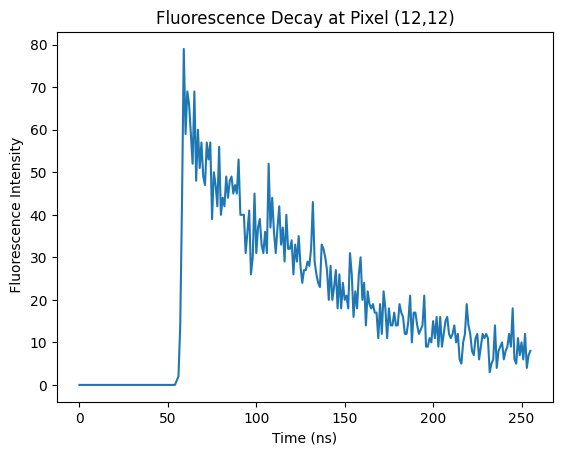

Intensity: 67.9543980911173
Tau1: 0.23252108942836114
Tau2: 3.7910543402986177
A1: 0.12233812801167154


In [ ]:
# Assuming sigD, I, t1, t2, rT are numpy arrays defined previously

# Plot a specific TPSF and display the parameters used for generation
xC = 12  # Python is 0-based indexing
yC = 12
plt.figure()
plt.plot(sigD[yC, xC, :])
plt.xlabel('Time (ns)')
plt.ylabel(' Fluorescence Intensity')
plt.title('Fluorescence Decay at Pixel (12,12)')

plt.show()
print(f"Intensity: {I[yC, xC]}")
print(f"Tau1: {t1[yC, xC]}")
print(f"Tau2: {t2[yC, xC]}")
print(f"A1: {rT[yC, xC]}")


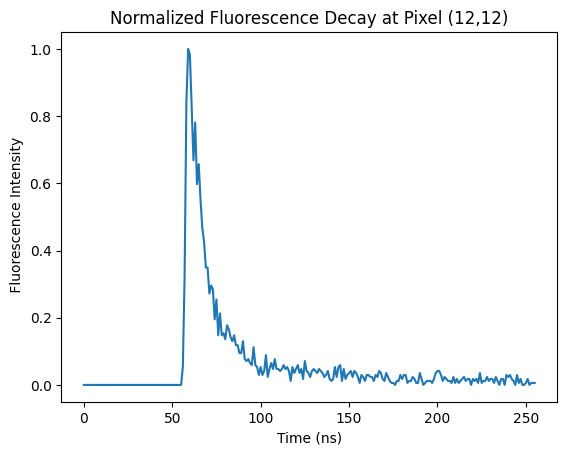

Intensity: 198.65893874682922
Tau1: 0.3944350068650917
Tau2: 4.374521278971478
A1: 0.9427570858484093


In [ ]:
# Assuming sigD, I, t1, t2, rT are numpy arrays defined previously

# Plot a specific TPSF and display the parameters used for generation
xC = 12  # Python is 0-based indexing
yC = 12
plt.figure()
plt.plot(sigD[yC, xC, :])
plt.xlabel('Time (ns)')
plt.ylabel(' Fluorescence Intensity')
plt.title('Normalized Fluorescence Decay at Pixel (12,12)')

plt.show()
print(f"Intensity: {I[yC, xC]}")
print(f"Tau1: {t1[yC, xC]}")
print(f"Tau2: {t2[yC, xC]}")
print(f"A1: {rT[yC, xC]}")


In [ ]:
with np.load('/content/drive/MyDrive/Thesis/100_data/a_00001_1.npz') as data:
    sigD = data['sigD']
    I = data['I']
    t1 = data['t1']
    t2 = data['t2']
    rT = data['rT']
    print(data.files)


['sigD', 'I', 't1', 't2', 'rT']


In [ ]:
print("Shape of sigD:", sigD.shape)
print("Shape of I:", I.shape)
print("Shape of t1:", t1.shape)
print("Shape of t2:", t2.shape)
print("Shape of rT:", rT.shape)


Shape of sigD: (256, 256, 256)
Shape of I: (256, 256)
Shape of t1: (256, 256)
Shape of t2: (256, 256)
Shape of rT: (256, 256)


In [ ]:
print("Max value of sigD:", np.max(sigD))
print("Min value of sigD:", np.min(sigD))

print("Max value of I:", np.max(I))
print("Min value of I:", np.min(I))

print("Max value of t1:", np.max(t1))
print("Min value of t1:", np.min(t1))

print("Max value of t2:", np.max(t2))
print("Min value of t2:", np.min(t2))

print("Max value of rT:", np.max(rT))
print("Min value of rT:", np.min(rT))


Max value of sigD: 1.0
Min value of sigD: 0.0
Max value of I: 299.9745822320785
Min value of I: 0.0
Max value of t1: 0.5999884678760594
Min value of t1: 0.0
Max value of t2: 1.199971293864048
Min value of t2: 0.0
Max value of rT: 0.9999450490242667
Min value of rT: 0.0


In [ ]:
def generate_intensity(image):
    """
    Generate an intensity map based on a given binary image.

    Parameters:
    - image (numpy.ndarray): A 2D binary image with shape (m, n) where m and n are the dimensions.

    Returns:
    - intensity (numpy.ndarray): A 2D array with shape (m, n), containing intensity values generated
                                 based on the input image. Values are between 50 and 300 for pixels
                                 that are 'on' in the input image and zero otherwise.

    Note:
    - The intensity values are generated randomly within the range 50-300.
    """

    # Get dimensions of the input image
    m, n = image.shape

    # Generate a random matrix of intensity values within the range 50-300
    int1 = np.random.rand(m, n) * 2000 + 1000

    # Multiply the random intensity matrix element-wise with the input image
    intensity = int1 * image

    return intensity


In [ ]:
def generate_lifetime(image):
    """
    Generate lifetime maps based on a given binary image.

    Parameters:
    - image (numpy.ndarray): A 2D binary image with shape (m, n) where m and n are the dimensions.

    Returns:
    - tau1 (numpy.ndarray): A 2D array with shape (m, n), containing lifetime values tau1.
                            The values are between 0.2 and 0.6 for pixels that are 'on' in the input image
                            and zero otherwise.

    - tau2 (numpy.ndarray): A 2D array with shape (m, n), containing lifetime values tau2.
                            The values are between 0.8 and 1.2 for pixels that are 'on' in the input image
                            and zero otherwise.

    - ratio (numpy.ndarray): A 2D array with shape (m, n), containing a ratio of the contributions from tau1
                             and tau2. The values are between 0 and 1 for pixels that are 'on' in the input
                             image and zero otherwise.

    Note:
    - tau1 and tau2 values are generated randomly within the specified ranges.
    - The ratio values are generated randomly between 0 and 1.
    """

    # Get dimensions of the input image
    m, n = image.shape

    # Generate random matrices for tau1 and tau2 with values in specified ranges
    tau1 = np.random.rand(m, n) * 0.4 + 0.2
    tau2 = np.random.rand(m, n) * 4.2 + 0.8

    # Element-wise multiply with the input image to nullify the areas where the image is zero
    tau1 = tau1 * image
    tau2 = tau2 * image

    # Generate a random matrix for the ratio of tau1 and tau2, also element-wise multiplied by the image
    ratio = np.random.rand(m, n) * image

    return tau1, tau2, ratio


Since your input image is binary, the pixels can be either 0 or 1. If a pixel in the image is 0, the corresponding value in tau1 or tau2 will be set to 0 because any number multiplied by 0 is 0. If a pixel in the image is 1, the corresponding value in tau1 or tau2 remains unchanged because any number multiplied by 1 is itself.

This operation is a way to make sure that the lifetime values (tau1 and tau2) are only non-zero where the image itself is non-zero. It essentially localizes the lifetime information to where there is actual content in the image.







The ratio here presumably serves as a weight between tau1 and tau2 for generating time-resolved signals later in the code. By doing this element-wise multiplication, the code ensures that ratio is relevant only where there is actual content in the image. The ratio values will be 0 where the image is 0.

Find the Maximum Offset: np.max(irf0[-100:]) finds the maximum value in the last 100 elements of the array irf0. This maximum value is stored in the variable offset.

Subtract Offset: irf0 - offset subtracts this maximum value from every element in the array irf0, generating a new array irf.

Thresholding: Finally, the line irf[irf < 0] = 0 sets all negative values in the array irf to zero. This is a form of thresholding, useful for ensuring all elements are non-negative.

The end result is an array irf where the maximum value of the last 100 elements in the original irf0 array has been subtracted from every element, and any resulting negative numbers have been set to zero.

In [ ]:
def generate_tpsfs(intensity, tau1, tau2, ratio):
    """
    Generate Time-Resolved Point Spread Functions (TPSFs) based on given parameters.

    Parameters:
    - intensity (numpy.ndarray): A 2D array containing intensity values.
    - tau1 (numpy.ndarray): A 2D array containing lifetime values tau1.
    - tau2 (numpy.ndarray): A 2D array containing lifetime values tau2.
    - ratio (numpy.ndarray): A 2D array containing the ratio of tau1 and tau2.
    - irf_whole (numpy.ndarray): A 2D array containing different IRFs.

    Returns:
    - full_data0 (numpy.ndarray): A 3D array containing TPSFs.

    Note:
    - The convolution with IRF is performed for each pixel.
    - Random Poisson noise is added to simulate real-world conditions.
    """
    M, N = intensity.shape
    nTG = 256  # Number of Time Gates
    width = 4e-2  # Time width
    time = np.arange(1, nTG + 1) * width

    full_data0 = np.zeros((M, N, nTG))  # Initialize data container

    for i in range(M):
        for j in range(N):
            if tau1[i, j] != 0:
                decay = ratio[i, j] * np.exp(-time / tau1[i, j]) + (1 - ratio[i, j]) * np.exp(-time / tau2[i, j])

                #irf = irf_whole[:, int(np.ceil(np.random.random() * len(irf_whole)))]
                # irf = irf_smooth(irf)  # Smooth the IRF
                irf = mean_irf

                # Convolve IRF with exponential decay
                decay = np.convolve(decay, irf / np.sum(irf), mode='full')

                # Add random time shifts to decay
                r = np.random.random()
                if r > 0.75:
                    decay = decay[:nTG]
                elif r < 0.25:
                    rC = int(np.round(np.random.random() * 2 + 1))
                    decay = np.concatenate([np.zeros(rC), decay[:nTG - rC]])
                else:
                    rC = int(np.round(np.random.random() * 2 + 1))
                    decay = decay[rC:nTG + rC]

                # Apply intensity scaling
                decay = decay * intensity[i, j]

                # Add Poisson noise
                cur = np.round(np.random.poisson(decay))

                # Normalize and store the generated TPSF
                full_data0[i, j, :] = cur / np.max(cur)

    return full_data0


The given code snippet appears to be setting up parameters for a data processing task, likely related to analyzing a 2D array called `intensity`. Here are the key steps:

1. **Get Shape of Intensity Matrix**: The line `M, N = intensity.shape` retrieves the shape of a 2D numpy array `intensity`, storing the dimensions in variables `M` and `N`.

2. **Set Time Gates**: `nTG = 160` sets the number of time gates (or time steps) to 160.

3. **Set Time Width**: `width = 4e-2` sets the time width for each gate to \(4 \times 10^{-2}\) (or 0.04). This could be in units such as seconds, but the unit isn't specified.

4. **Create Time Array**: `time = np.arange(1, nTG + 1) * width` generates an array of time steps. The `np.arange(1, nTG + 1)` creates an array from 1 to 160 (inclusive), and then this is multiplied by `width` to scale it.

After running this code, you'd have:
- `M` and `N` as the dimensions of your intensity array.
- `nTG` as the number of time gates you're considering.
- `width` as the time step or width of each gate.
- `time` as an array containing the scaled time steps from 1 to 160, each multiplied by 0.04.

The code is reasonably straightforward but encapsulates important parameters and initializations that would likely be used in subsequent calculations or analyses.



This line of code randomly selects one of the Instrument Response Functions (IRFs) stored in irf_whole for use in the current loop iteration. Let's break down what's happening step-by-step:

np.random.random(): Generates a random float in the range [0, 1).

np.random.random() * len(irf_whole): Multiplies this random float by the length of irf_whole, effectively randomizing an index within the bounds of this array.

np.ceil(): Rounds this random index up to the nearest integer to ensure it's a valid index.

int(): Converts this rounded number to an integer type for indexing.

irf_whole[:, int(...)]: Selects one of the columns (all rows, one column specified by the random index) from irf_whole.

The selected IRF is stored in irf, and it will be used for the convolution operation with the exponential decay function (decay) in the subsequent code. This step introduces an element of randomness to the model, mimicking how in real-world experiments, different detectors might have slightly different IRFs. By doing this, the simulated Time-Resolved Point Spread Functions (TPSFs) are made to resemble real-world measurements more closely.

In the context of Fluorescence Lifetime Imaging Microscopy (FLIM), the Temporal Point Spread Function (TPSF) becomes particularly important. FLIM captures the spatial distribution of fluorescence lifetimes within a sample, which can provide valuable biological or chemical information. However, the fluorescence decay is not an instantaneous process; it evolves over time following a pulse of excitation light.

The TPSF in FLIM characterizes how a short pulse of excitation light disperses both spatially and temporally as it interacts with fluorescent molecules in the sample. When the excitation light pulse hits the sample, the molecules absorb energy and re-emit it as fluorescence. This fluorescence emission has a temporal profile—often an exponential decay—governed by the lifetimes of the fluorescent states of the molecules. When you measure this emitted light, you're actually observing a convolution of the intrinsic decay and the system's TPSF.

By knowing the TPSF, you can more accurately deconvolve the measured signal to obtain the intrinsic fluorescence lifetimes, which can be indicators of the local environment, such as pH, ion concentration, or even the binding of molecules. The TPSF accounts for any time delays, pulse stretching, or other temporal distortions introduced by the optical setup.

So, in FLIM, understanding the TPSF allows for more accurate lifetime measurements, which in turn makes the derived biological or chemical information more reliable.







In Fluorescence Lifetime Imaging Microscopy (FLIM) and similar time-resolved techniques, the Instrument Response Function (IRF) plays a critical role in interpreting the data. The IRF characterizes the temporal response of the entire measurement system, from the light source, detectors, to the electronics. In other words, it's the system's "answer" to an idealized, instantaneous pulse of light. When you introduce a brief flash of light into the system, the IRF describes how that light pulse is broadened, delayed, or otherwise altered as it passes through the system's components.

The IRF is crucial because the fluorescence decay profiles you measure are actually a convolution of the sample's intrinsic decay profile with the IRF. Therefore, to obtain accurate information about the sample's true decay dynamics—namely, the fluorescence lifetimes—you need to deconvolve the measured signals with the IRF.

Here's where the Temporal Point Spread Function (TPSF) comes into play. The TPSF, in the context of FLIM, is affected not just by the intrinsic properties of the fluorescent sample but also by the IRF. So, when you measure a TPSF, you're getting a combined effect of the sample's fluorescence decay and the system's IRF.

Knowing the IRF allows you to "correct" for these system-induced distortions in the TPSF, thereby making it possible to more accurately determine the fluorescence lifetimes and other parameters of interest in your sample. Accurate lifetime measurements are essential for deriving meaningful biological or chemical insights from FLIM data.

In [ ]:
first_array.shape[2]

1000

In [ ]:
f_data = '/content/drive/MyDrive/Thesis/100_data/' # Directory with training data
stacks = os.listdir(f_data)
numS = len(stacks)
numS

100

In [ ]:
rand_idx = np.random.randint(0, first_array2.shape[2])

In [ ]:
rand_idx

3

Data Augmentation

In [ ]:
N_total = 20
k = 1

while k <= N_total:  # Use <= to ensure N_total images are processed
    # Randomly select an image
    #rand_idx = np.random.randint(0, first_array2.shape[2])
    rand_idx = 3
    im_binary = first_array2[:, :, rand_idx]

    # Check if the image has a pixel sum above 280
    if np.sum(im_binary) >= 250:
        img = Image.fromarray(im_binary.astype('uint8'))  # Convert to PIL Image

        # Randomly select a rotation angle
        angle = random.choice([19, 25, 112, 161])
        img_rotated = img.rotate(angle)

        # Randomly decide whether to flip the image
        if random.choice([True, False]):  # 50% chance
            img_rotated = ImageOps.mirror(img_rotated)  # Flip the image

        # Convert the PIL image back to a numpy array if your functions expect numpy array input
        # This step is crucial if the augmentation changes need to be reflected in the data passed to subsequent functions
        im_binary = np.array(img_rotated)

        # Generate intensity and lifetime maps (your functions should be defined to handle im_augmented)
        # Assuming generate_intensity, generate_lifetime, generate_tpsfs functions are properly defined to accept the augmented image data
        inten = generate_intensity(im_binary)
        tau1, tau2, ratio = generate_lifetime(im_binary)
        data = generate_tpsfs(inten, tau1, tau2, ratio)


        m, n = im_binary.shape

        t1 = tau1
        t2 = tau2
        rT = ratio
        sigD = data
        I = inten * im_binary

        # Assign path along with file name
        pathN = '/content/drive/MyDrive/test/1000-3000'
        if not os.path.exists(pathN):
            os.makedirs(pathN)  # Create the directory if it doesn't exist

        filenm = os.path.join(pathN, f'a_{str(k).zfill(5)}_1')

        # Save the data
        np.savez(f"{filenm}.npz", sigD=sigD, I=I, t1=t1, t2=t2, rT=rT)

        k += 1  # Increment only if the image meets the condition and has been processed


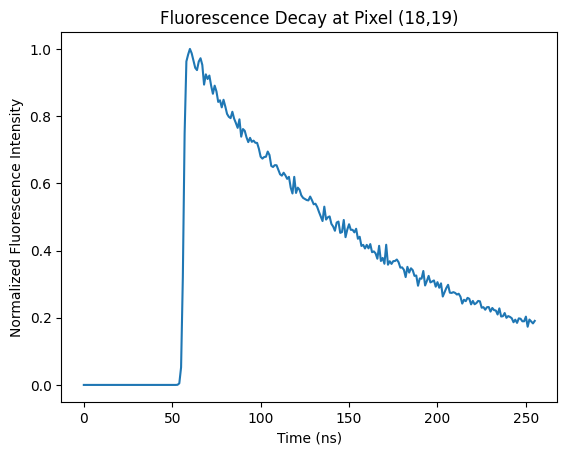

Intensity: 2652.780669314203
Tau1: 0.3428354556551294
Tau2: 4.629027447501435
A1: 0.03425971439814557


In [ ]:
# Assuming sigD, I, t1, t2, rT are numpy arrays defined previously

# Plot a specific TPSF and display the parameters used for generation
xC = 19  # Python is 0-based indexing
yC = 18
plt.figure()
plt.plot(sigD[yC, xC, :])
plt.xlabel('Time (ns)')
plt.ylabel('Normalized Fluorescence Intensity')
plt.title(f'Fluorescence Decay at Pixel ({yC},{xC})')

plt.show()
print(f"Intensity: {I[yC, xC]}")
print(f"Tau1: {t1[yC, xC]}")
print(f"Tau2: {t2[yC, xC]}")
print(f"A1: {rT[yC, xC]}")


In [ ]:
N_total = 2
k = 1

while k <= N_total:  # Use <= to ensure N_total images are processed
    # Randomly select an image
    rand_idx = np.random.randint(0, first_array1.shape[2])
    im_binary = first_array1[:, :, rand_idx]

    # Check if the image has a pixel sum above 280
    if np.sum(im_binary) >= 250:
        img = Image.fromarray(im_binary.astype('uint8'))  # Convert to PIL Image

        # Randomly select a rotation angle
        angle = random.choice([90, 60, 30, 45])
        img_rotated = img.rotate(angle)

        # Randomly decide whether to flip the image
        if random.choice([True, False]):  # 50% chance
            img_rotated = ImageOps.mirror(img_rotated)  # Flip the image

        # Convert the PIL image back to a numpy array if your functions expect numpy array input
        # This step is crucial if the augmentation changes need to be reflected in the data passed to subsequent functions
        im_binary = np.array(img_rotated)

        # Generate intensity and lifetime maps (your functions should be defined to handle im_augmented)
        # Assuming generate_intensity, generate_lifetime, generate_tpsfs functions are properly defined to accept the augmented image data
        inten = generate_intensity(im_binary)
        tau1, tau2, ratio = generate_lifetime(im_binary)
        data = generate_tpsfs(inten, tau1, tau2, ratio)


        m, n = im_binary.shape

        t1 = tau1
        t2 = tau2
        rT = ratio
        sigD = data
        I = inten * im_binary

        # Assign path along with file name
        pathN = '/content/drive/MyDrive/test/10-50'
        if not os.path.exists(pathN):
            os.makedirs(pathN)  # Create the directory if it doesn't exist

        filenm = os.path.join(pathN, f'a_{str(k).zfill(5)}_1')

        # Save the data
        np.savez(f"{filenm}.npz", sigD=sigD, I=I, t1=t1, t2=t2, rT=rT)

        k += 1  # Increment only if the image meets the condition and has been processed


In [ ]:
N_total = 250
k = 1

while k <= N_total:  # Use <= to ensure N_total images are processed
    # Randomly select an image
    rand_idx = np.random.randint(0, first_array1.shape[2])
    im_binary = first_array1[:, :, rand_idx]

    # Check if the image has a pixel sum above 280
    if np.sum(im_binary) >= 250:
        img = Image.fromarray(im_binary.astype('uint8'))  # Convert to PIL Image

        # Randomly select a rotation angle
        angle = random.choice([90, 60, 30, 45])
        img_rotated = img.rotate(angle)

        # Randomly decide whether to flip the image
        if random.choice([True, False]):  # 50% chance
            img_rotated = ImageOps.mirror(img_rotated)  # Flip the image

        # Convert the PIL image back to a numpy array if your functions expect numpy array input
        # This step is crucial if the augmentation changes need to be reflected in the data passed to subsequent functions
        im_binary = np.array(img_rotated)

        # Generate intensity and lifetime maps (your functions should be defined to handle im_augmented)
        # Assuming generate_intensity, generate_lifetime, generate_tpsfs functions are properly defined to accept the augmented image data
        inten = generate_intensity(im_binary)
        tau1, tau2, ratio = generate_lifetime(im_binary)
        data = generate_tpsfs(inten, tau1, tau2, ratio)


        m, n = im_binary.shape

        t1 = tau1
        t2 = tau2
        rT = ratio
        sigD = data
        I = inten * im_binary

        # Assign path along with file name
        pathN = '/content/drive/MyDrive/10-50/250'
        if not os.path.exists(pathN):
            os.makedirs(pathN)  # Create the directory if it doesn't exist

        filenm = os.path.join(pathN, f'a_{str(k).zfill(5)}_1')

        # Save the data
        np.savez(f"{filenm}.npz", sigD=sigD, I=I, t1=t1, t2=t2, rT=rT)

        k += 1  # Increment only if the image meets the condition and has been processed


In [ ]:
N_total = 500
k = 1

while k <= N_total:  # Use <= to ensure N_total images are processed
    # Randomly select an image
    rand_idx = np.random.randint(0, first_array1.shape[2])
    im_binary = first_array1[:, :, rand_idx]

    # Check if the image has a pixel sum above 280
    if np.sum(im_binary) >= 250:
        img = Image.fromarray(im_binary.astype('uint8'))  # Convert to PIL Image

        # Randomly select a rotation angle
        angle = random.choice([90, 60, 30, 45])
        img_rotated = img.rotate(angle)

        # Randomly decide whether to flip the image
        if random.choice([True, False]):  # 50% chance
            img_rotated = ImageOps.mirror(img_rotated)  # Flip the image

        # Convert the PIL image back to a numpy array if your functions expect numpy array input
        # This step is crucial if the augmentation changes need to be reflected in the data passed to subsequent functions
        im_binary = np.array(img_rotated)

        # Generate intensity and lifetime maps (your functions should be defined to handle im_augmented)
        # Assuming generate_intensity, generate_lifetime, generate_tpsfs functions are properly defined to accept the augmented image data
        inten = generate_intensity(im_binary)
        tau1, tau2, ratio = generate_lifetime(im_binary)
        data = generate_tpsfs(inten, tau1, tau2, ratio)


        m, n = im_binary.shape

        t1 = tau1
        t2 = tau2
        rT = ratio
        sigD = data
        I = inten * im_binary

        # Assign path along with file name
        pathN = '/content/drive/MyDrive/10-50/500'
        if not os.path.exists(pathN):
            os.makedirs(pathN)  # Create the directory if it doesn't exist

        filenm = os.path.join(pathN, f'a_{str(k).zfill(5)}_1')

        # Save the data
        np.savez(f"{filenm}.npz", sigD=sigD, I=I, t1=t1, t2=t2, rT=rT)

        k += 1  # Increment only if the image meets the condition and has been processed


In [ ]:
data = np.load('/content/norm/a_00001_1.npz')
sigD_n = data['sigD']  # Assuming sigD is the data you want to work with

In [ ]:
data = np.load('/content/Untitled Folder/a_00001_1.npz')
sigD = data['sigD']  # Assuming sigD is the data you want to work with

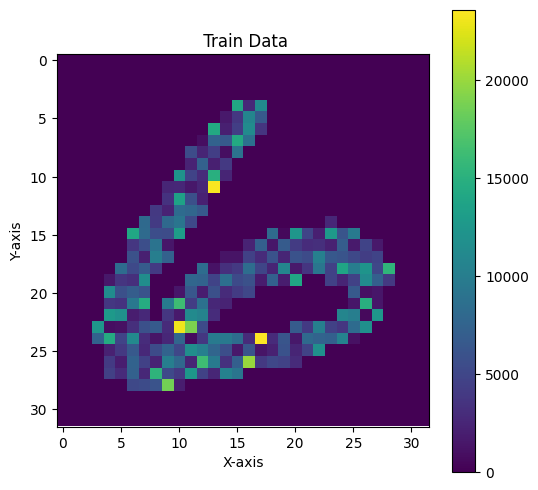

In [ ]:
# Sum the intensities along the depth axis to create a 2D projection
intensity = sigD.sum(axis=2)

# Plot the normalized intensity projection
plt.figure(figsize=(6, 6))
plt.imshow(intensity, cmap='viridis')
plt.colorbar()
plt.title(' Train Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


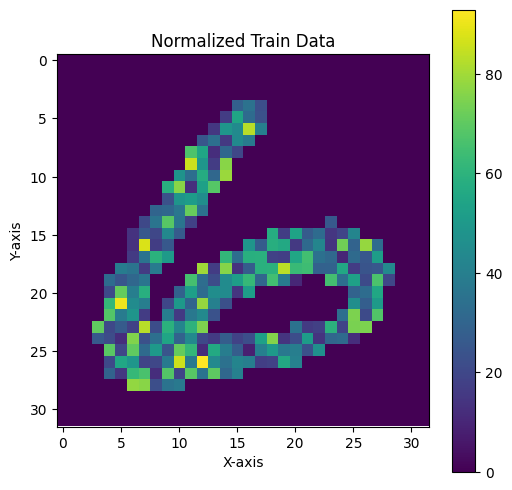

In [ ]:
# Sum the intensities along the depth axis to create a 2D projection
intensity = sigD_n.sum(axis=2)

# Plot the normalized intensity projection
plt.figure(figsize=(6, 6))
plt.imshow(intensity, cmap='viridis')
plt.colorbar()
plt.title('Normalized Train Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

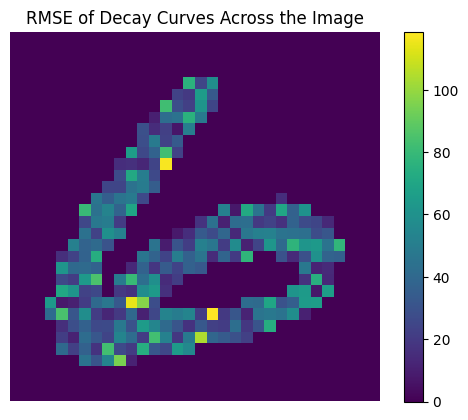

In [ ]:

# Function to compute RMSE between decay curves
def rmse(a, b):
    return np.sqrt(np.mean((a - b)**2))

# Compute RMSE for each pixel
height, width, _ = sigD.shape
rmse_map = np.zeros((height, width))

for i in range(height):
    for j in range(width):
        rmse_map[i, j] = rmse(sigD[i, j, :], sigD_n[i, j, :])

# Visualization of RMSE across the image
plt.imshow(rmse_map, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('RMSE of Decay Curves Across the Image')
plt.axis('off')
plt.show()


In [ ]:
%%capture
pip install scikit-image


In [ ]:
from skimage.metrics import structural_similarity as compare_ssim

In [ ]:
# Compute SSIM for the specific pair of images
ssim_score = compare_ssim(sigD, sigD_n)

print(f"SSIM for the image at index: {ssim_score}")

SSIM for the image at index: 0.32175818316389704
